# Household Electricity Consumption Analysis

The Project is done to find out the most important areas in the houshold that consume most electricity and to predict electricity consumption.

# Importing Libraries

In [319]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Loading and exploring Data

In [320]:
df = pd.read_csv("Electricity_data.csv")

In [321]:
df.head()

,timestamp,Main I,AC,Living Rm,Lights living / bath / baby,Bath plgs,(unnamed II - A),Fridge,Kitchn / dining Lts,Furnace,Microwave,Guest,test,Guest bath,Mini Fridge/Dshwshr,Other,use,mains,Price
0,2016-07-31 09:00:00-05:00,909.066398,1452.204957,70.742116,90.943929,0.0,1135.464789,101.452290,60.543820,0.000000,6.161513,0.000000,943.106552,0.000000,46.881162,0.0,2044.531187,2044.531187,17.172065
1,2016-07-31 10:00:00-05:00,928.834122,1153.470483,121.270728,89.073750,0.0,1068.735597,133.702863,106.016417,149.113886,37.952398,125.527769,943.106552,26.302717,28.151907,0.0,1997.569719,1997.569719,17.321235
2,2016-07-31 11:00:00-05:00,780.028611,1090.394879,101.716817,0.000000,0.0,987.202778,38.674079,162.201625,145.187357,6.157197,115.612561,943.106552,50.466295,27.356844,0.0,1767.231389,1767.231389,15.459758
3,2016-07-31 12:00:00-05:00,577.240556,655.752587,89.095648,15.071262,0.0,742.453333,57.763612,161.788384,87.997235,38.938323,130.161645,943.106552,26.339928,31.385268,0.0,1319.693889,1319.693889,12.053404
4,2016-07-31 13:00:00-05:00,1180.745556,1626.139890,84.774443,0.000000,0.0,1307.005833,63.439516,160.824700,190.763621,6.260919,264.954291,943.106552,29.593455,31.506551,0.0,2487.751389,2487.751389,21.122323


In [322]:
df.shape

(126, 19)

In [323]:
df.columns

Index(['timestamp', 'Main I', 'AC', 'Living Rm', 'Lights living / bath / baby',
       'Bath plgs', '(unnamed II - A)', 'Fridge', 'Kitchn / dining  Lts',
       'Furnace', 'Microwave', 'Guest', 'test', 'Guest bath',
       'Mini Fridge/Dshwshr', 'Other', 'use', 'mains', 'Price'],
      dtype='object')

In [324]:
df.head()

,timestamp,Main I,AC,Living Rm,Lights living / bath / baby,Bath plgs,(unnamed II - A),Fridge,Kitchn / dining Lts,Furnace,Microwave,Guest,test,Guest bath,Mini Fridge/Dshwshr,Other,use,mains,Price
0,2016-07-31 09:00:00-05:00,909.066398,1452.204957,70.742116,90.943929,0.0,1135.464789,101.452290,60.543820,0.000000,6.161513,0.000000,943.106552,0.000000,46.881162,0.0,2044.531187,2044.531187,17.172065
1,2016-07-31 10:00:00-05:00,928.834122,1153.470483,121.270728,89.073750,0.0,1068.735597,133.702863,106.016417,149.113886,37.952398,125.527769,943.106552,26.302717,28.151907,0.0,1997.569719,1997.569719,17.321235
2,2016-07-31 11:00:00-05:00,780.028611,1090.394879,101.716817,0.000000,0.0,987.202778,38.674079,162.201625,145.187357,6.157197,115.612561,943.106552,50.466295,27.356844,0.0,1767.231389,1767.231389,15.459758
3,2016-07-31 12:00:00-05:00,577.240556,655.752587,89.095648,15.071262,0.0,742.453333,57.763612,161.788384,87.997235,38.938323,130.161645,943.106552,26.339928,31.385268,0.0,1319.693889,1319.693889,12.053404
4,2016-07-31 13:00:00-05:00,1180.745556,1626.139890,84.774443,0.000000,0.0,1307.005833,63.439516,160.824700,190.763621,6.260919,264.954291,943.106552,29.593455,31.506551,0.0,2487.751389,2487.751389,21.122323


In [325]:
df1 = df.drop(["(unnamed II - A)"], axis = 1)

In [326]:
df1.head()

,timestamp,Main I,AC,Living Rm,Lights living / bath / baby,Bath plgs,Fridge,Kitchn / dining Lts,Furnace,Microwave,Guest,test,Guest bath,Mini Fridge/Dshwshr,Other,use,mains,Price
0,2016-07-31 09:00:00-05:00,909.066398,1452.204957,70.742116,90.943929,0.0,101.452290,60.543820,0.000000,6.161513,0.000000,943.106552,0.000000,46.881162,0.0,2044.531187,2044.531187,17.172065
1,2016-07-31 10:00:00-05:00,928.834122,1153.470483,121.270728,89.073750,0.0,133.702863,106.016417,149.113886,37.952398,125.527769,943.106552,26.302717,28.151907,0.0,1997.569719,1997.569719,17.321235
2,2016-07-31 11:00:00-05:00,780.028611,1090.394879,101.716817,0.000000,0.0,38.674079,162.201625,145.187357,6.157197,115.612561,943.106552,50.466295,27.356844,0.0,1767.231389,1767.231389,15.459758
3,2016-07-31 12:00:00-05:00,577.240556,655.752587,89.095648,15.071262,0.0,57.763612,161.788384,87.997235,38.938323,130.161645,943.106552,26.339928,31.385268,0.0,1319.693889,1319.693889,12.053404
4,2016-07-31 13:00:00-05:00,1180.745556,1626.139890,84.774443,0.000000,0.0,63.439516,160.824700,190.763621,6.260919,264.954291,943.106552,29.593455,31.506551,0.0,2487.751389,2487.751389,21.122323


In [327]:
df1.tail()

,timestamp,Main I,AC,Living Rm,Lights living / bath / baby,Bath plgs,Fridge,Kitchn / dining Lts,Furnace,Microwave,Guest,test,Guest bath,Mini Fridge/Dshwshr,Other,use,mains,Price
121,2016-08-05 10:00:00-05:00,551.518175,437.776361,95.171046,0.0,0.0,123.136775,284.752812,78.759463,18.555323,208.641485,0.000000,83.188461,27.862243,54.117082,1417.832901,1417.832901,10.606111
122,2016-08-05 11:00:00-05:00,1015.494462,1519.170920,97.483359,0.0,0.0,52.678907,280.978985,190.003626,24.843447,115.054472,0.000000,27.582622,26.907925,83.710481,2423.834726,2423.834726,18.302289
123,2016-08-05 12:00:00-05:00,1244.441705,1938.107544,97.141069,0.0,0.0,87.987209,276.594146,224.485636,44.531646,131.753148,0.000000,40.814037,32.239385,94.235169,2973.056964,2973.056964,22.450163
124,2016-08-05 13:00:00-05:00,1420.091312,2108.369726,95.256924,0.0,0.0,25.781737,284.754681,234.107070,29.231001,220.195155,0.000000,39.346018,31.398208,99.844245,3173.287608,3173.287608,24.166242
125,2016-08-05 14:00:00-05:00,1442.132208,2168.301744,99.082713,0.0,0.0,58.484326,274.284817,233.606837,43.931359,207.997334,11.022308,28.116251,25.575840,95.181868,3245.585397,3245.585397,24.705343


In [328]:
df1['Dates'] = pd.to_datetime(df1['timestamp']).dt.date
df1['Time'] = pd.to_datetime(df1['timestamp']).dt.time

In [329]:
df1.head()

,timestamp,Main I,AC,Living Rm,Lights living / bath / baby,Bath plgs,Fridge,Kitchn / dining Lts,Furnace,Microwave,Guest,test,Guest bath,Mini Fridge/Dshwshr,Other,use,mains,Price,Dates,Time
0,2016-07-31 09:00:00-05:00,909.066398,1452.204957,70.742116,90.943929,0.0,101.452290,60.543820,0.000000,6.161513,0.000000,943.106552,0.000000,46.881162,0.0,2044.531187,2044.531187,17.172065,2016-07-31,09:00:00
1,2016-07-31 10:00:00-05:00,928.834122,1153.470483,121.270728,89.073750,0.0,133.702863,106.016417,149.113886,37.952398,125.527769,943.106552,26.302717,28.151907,0.0,1997.569719,1997.569719,17.321235,2016-07-31,10:00:00
2,2016-07-31 11:00:00-05:00,780.028611,1090.394879,101.716817,0.000000,0.0,38.674079,162.201625,145.187357,6.157197,115.612561,943.106552,50.466295,27.356844,0.0,1767.231389,1767.231389,15.459758,2016-07-31,11:00:00
3,2016-07-31 12:00:00-05:00,577.240556,655.752587,89.095648,15.071262,0.0,57.763612,161.788384,87.997235,38.938323,130.161645,943.106552,26.339928,31.385268,0.0,1319.693889,1319.693889,12.053404,2016-07-31,12:00:00
4,2016-07-31 13:00:00-05:00,1180.745556,1626.139890,84.774443,0.000000,0.0,63.439516,160.824700,190.763621,6.260919,264.954291,943.106552,29.593455,31.506551,0.0,2487.751389,2487.751389,21.122323,2016-07-31,13:00:00


In [330]:
df1.shape

(126, 20)

In [331]:
df2 = df1.drop(["timestamp"],axis = 1)

In [332]:
df2.columns

Index(['Main I', 'AC', 'Living Rm', 'Lights living / bath / baby', 'Bath plgs',
       'Fridge', 'Kitchn / dining  Lts', 'Furnace', 'Microwave', 'Guest',
       'test', 'Guest bath', 'Mini Fridge/Dshwshr', 'Other', 'use', 'mains',
       'Price', 'Dates', 'Time'],
      dtype='object')

In [335]:
df2 = df2[['Dates', 'Time', 'Main I', 'AC', 'Living Rm', 'Lights living / bath / baby', 'Bath plgs',
       'Fridge', 'Kitchn / dining  Lts', 'Furnace', 'Microwave',
       'Guest', 'test', 'Guest bath', 'Mini Fridge/Dshwshr', 'Other', 'use',
       'mains', 'Price']]

In [336]:
df2.head()

,Dates,Time,Main I,AC,Living Rm,Lights living / bath / baby,Bath plgs,Fridge,Kitchn / dining Lts,Furnace,Microwave,Guest,test,Guest bath,Mini Fridge/Dshwshr,Other,use,mains,Price
0,2016-07-31,09:00:00,909.066398,1452.204957,70.742116,90.943929,0.0,101.452290,60.543820,0.000000,6.161513,0.000000,943.106552,0.000000,46.881162,0.0,2044.531187,2044.531187,17.172065
1,2016-07-31,10:00:00,928.834122,1153.470483,121.270728,89.073750,0.0,133.702863,106.016417,149.113886,37.952398,125.527769,943.106552,26.302717,28.151907,0.0,1997.569719,1997.569719,17.321235
2,2016-07-31,11:00:00,780.028611,1090.394879,101.716817,0.000000,0.0,38.674079,162.201625,145.187357,6.157197,115.612561,943.106552,50.466295,27.356844,0.0,1767.231389,1767.231389,15.459758
3,2016-07-31,12:00:00,577.240556,655.752587,89.095648,15.071262,0.0,57.763612,161.788384,87.997235,38.938323,130.161645,943.106552,26.339928,31.385268,0.0,1319.693889,1319.693889,12.053404
4,2016-07-31,13:00:00,1180.745556,1626.139890,84.774443,0.000000,0.0,63.439516,160.824700,190.763621,6.260919,264.954291,943.106552,29.593455,31.506551,0.0,2487.751389,2487.751389,21.122323


In [337]:
df2.tail()

,Dates,Time,Main I,AC,Living Rm,Lights living / bath / baby,Bath plgs,Fridge,Kitchn / dining Lts,Furnace,Microwave,Guest,test,Guest bath,Mini Fridge/Dshwshr,Other,use,mains,Price
121,2016-08-05,10:00:00,551.518175,437.776361,95.171046,0.0,0.0,123.136775,284.752812,78.759463,18.555323,208.641485,0.000000,83.188461,27.862243,54.117082,1417.832901,1417.832901,10.606111
122,2016-08-05,11:00:00,1015.494462,1519.170920,97.483359,0.0,0.0,52.678907,280.978985,190.003626,24.843447,115.054472,0.000000,27.582622,26.907925,83.710481,2423.834726,2423.834726,18.302289
123,2016-08-05,12:00:00,1244.441705,1938.107544,97.141069,0.0,0.0,87.987209,276.594146,224.485636,44.531646,131.753148,0.000000,40.814037,32.239385,94.235169,2973.056964,2973.056964,22.450163
124,2016-08-05,13:00:00,1420.091312,2108.369726,95.256924,0.0,0.0,25.781737,284.754681,234.107070,29.231001,220.195155,0.000000,39.346018,31.398208,99.844245,3173.287608,3173.287608,24.166242
125,2016-08-05,14:00:00,1442.132208,2168.301744,99.082713,0.0,0.0,58.484326,274.284817,233.606837,43.931359,207.997334,11.022308,28.116251,25.575840,95.181868,3245.585397,3245.585397,24.705343


# Exploratory Data Analysis

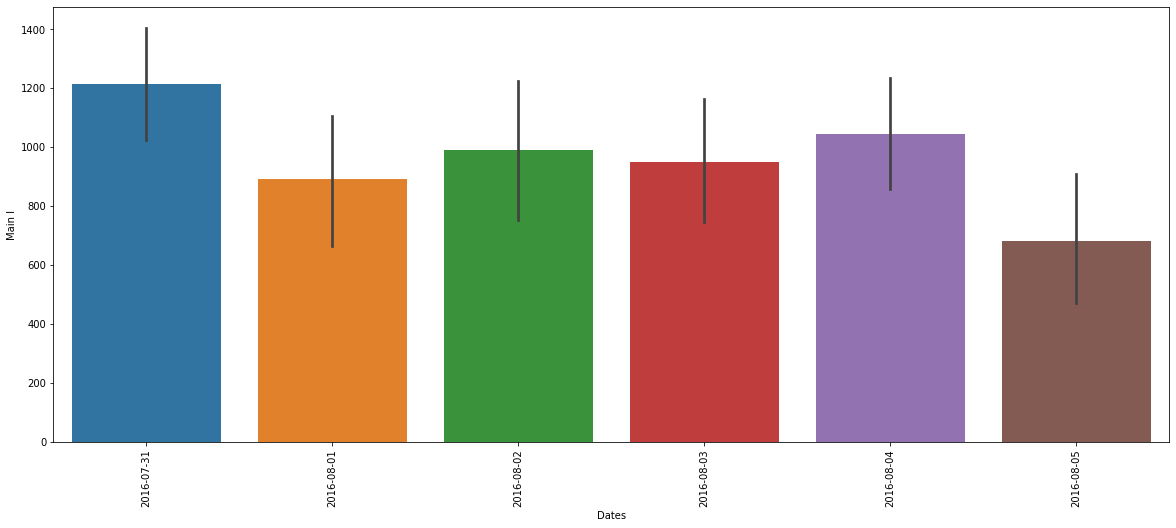

In [338]:
plt.figure(figsize=(20,8))
x = df2["Dates"]
y = df2["Main I"]
plt.xticks(rotation=90)
sns.barplot(x,y)

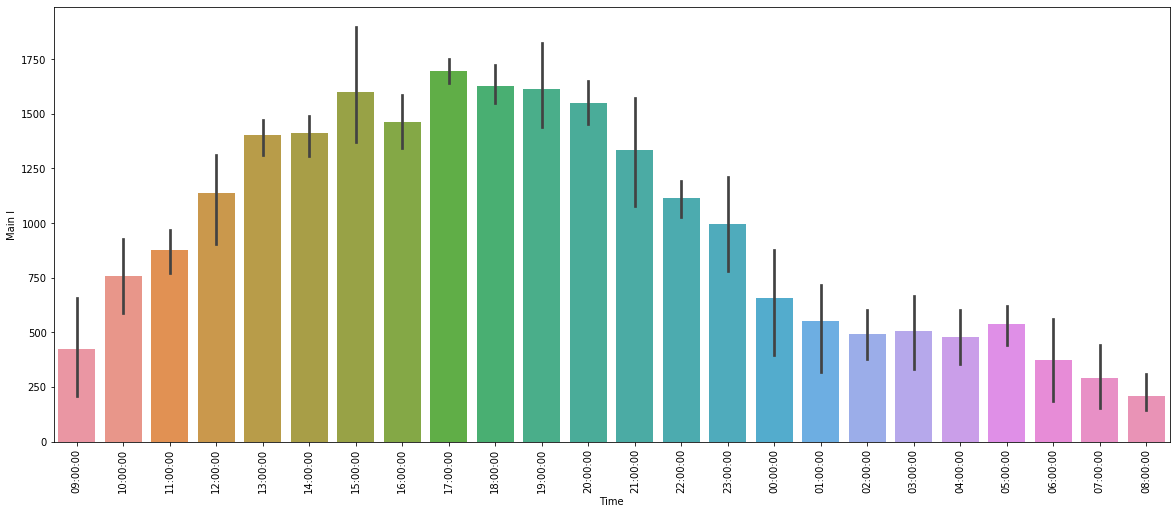

In [339]:
plt.figure(figsize=(20,8))
x = df2["Time"]
y = df2["Main I"]
plt.xticks(rotation=90)
sns.barplot(x,y)

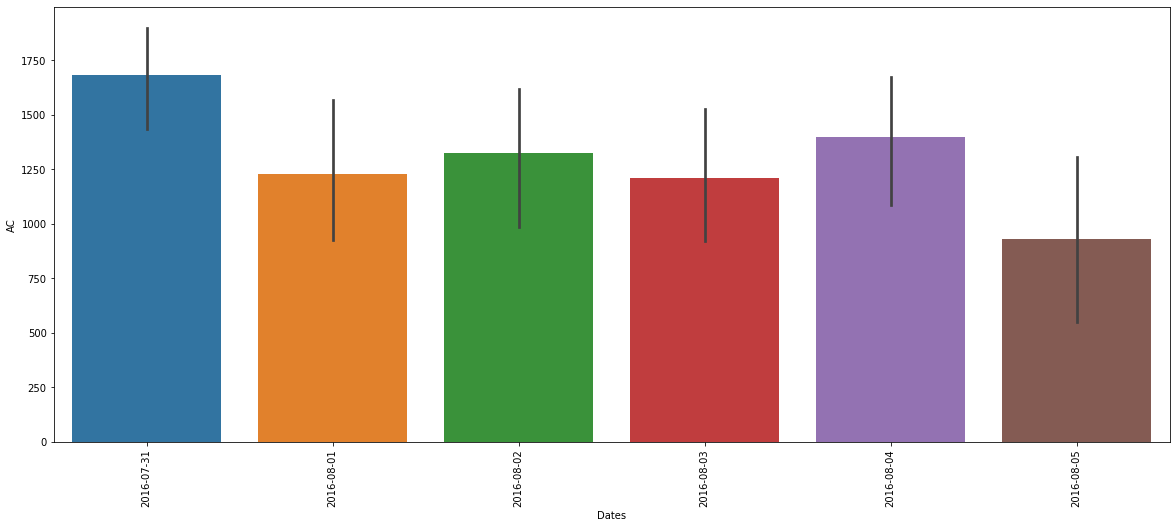

In [340]:
plt.figure(figsize=(20,8))
x = df2["Dates"]
y = df2["AC"]
plt.xticks(rotation=90)
sns.barplot(x,y)

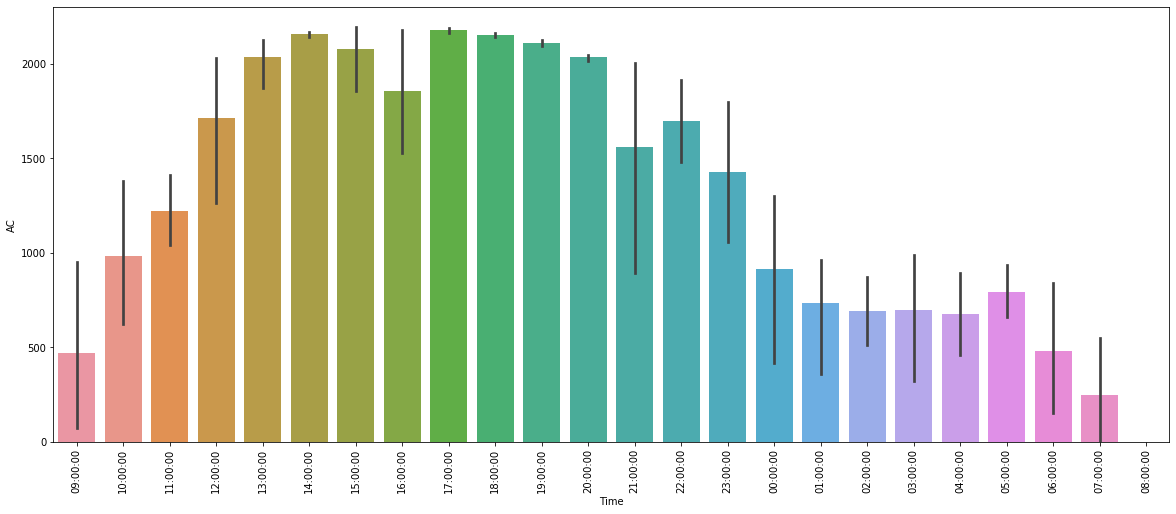

In [341]:
plt.figure(figsize=(20,8))
x = df2["Time"]
y = df2["AC"]
plt.xticks(rotation=90)
sns.barplot(x,y)

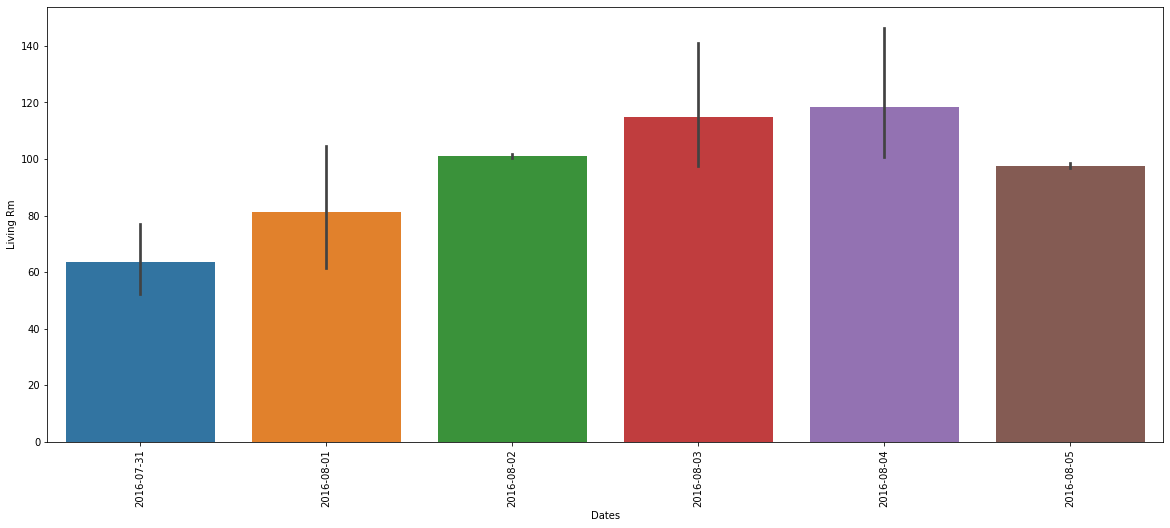

In [342]:
plt.figure(figsize=(20,8))
x = df2["Dates"]
y = df2["Living Rm"]
plt.xticks(rotation=90)
sns.barplot(x,y)

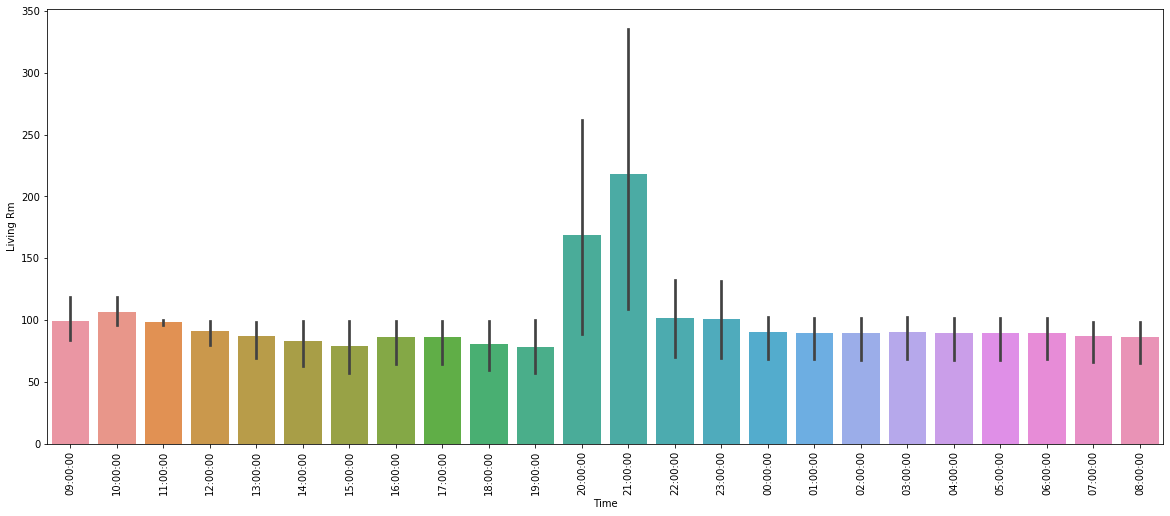

In [343]:
plt.figure(figsize=(20,8))
x = df2["Time"]
y = df2["Living Rm"]
plt.xticks(rotation=90)
sns.barplot(x,y)

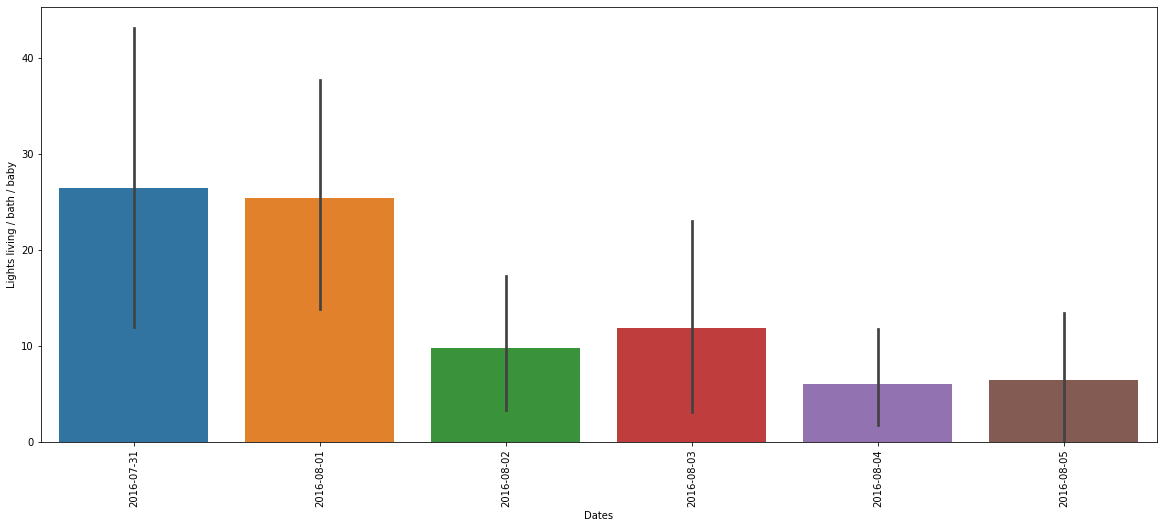

In [344]:
plt.figure(figsize=(20,8))
x = df2["Dates"]
y = df2["Lights living / bath / baby"]
plt.xticks(rotation=90)
sns.barplot(x,y)

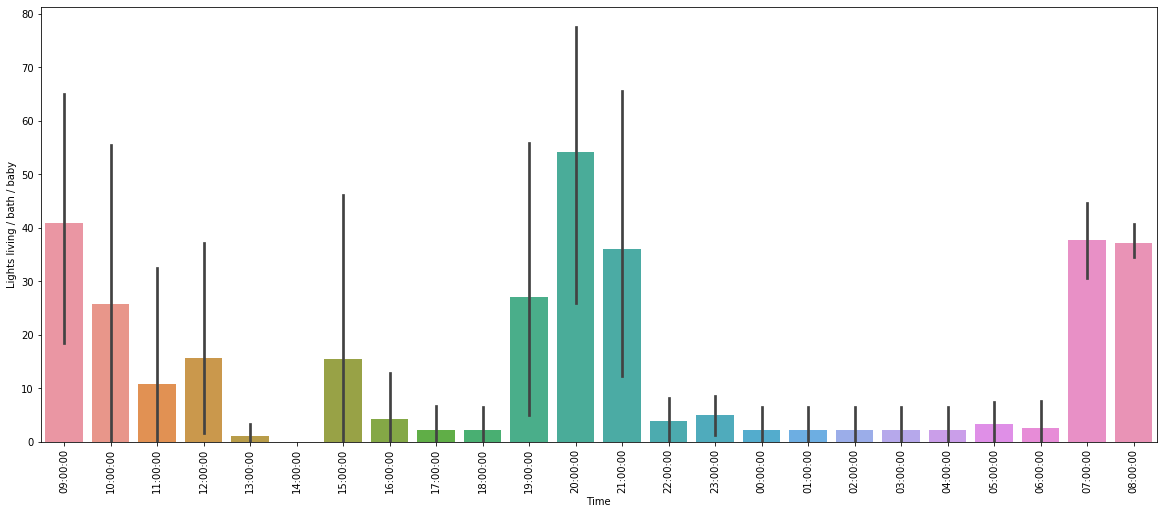

In [345]:
plt.figure(figsize=(20,8))
x = df2["Time"]
y = df2["Lights living / bath / baby"]
plt.xticks(rotation=90)
sns.barplot(x,y)

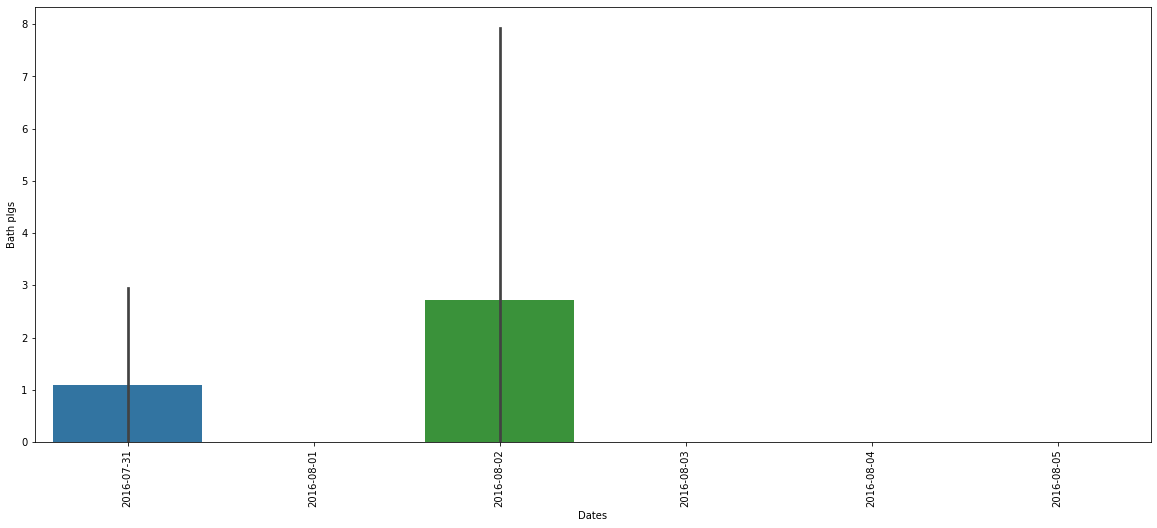

In [346]:
plt.figure(figsize=(20,8))
x = df2["Dates"]
y = df2["Bath plgs"]
plt.xticks(rotation=90)
sns.barplot(x,y)

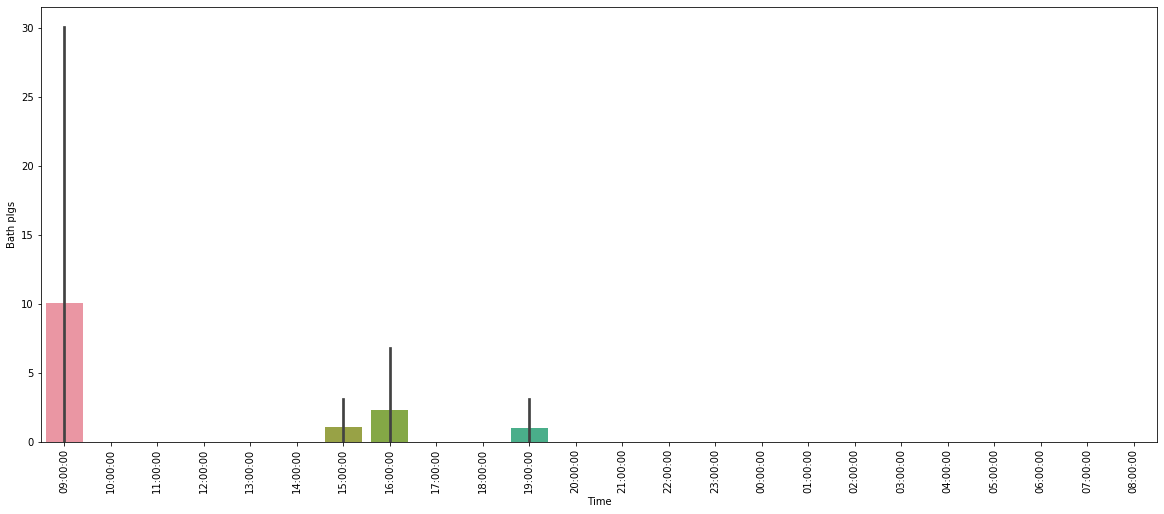

In [347]:
plt.figure(figsize=(20,8))
x = df1["Time"]
y = df1["Bath plgs"]
plt.xticks(rotation=90)
sns.barplot(x,y)

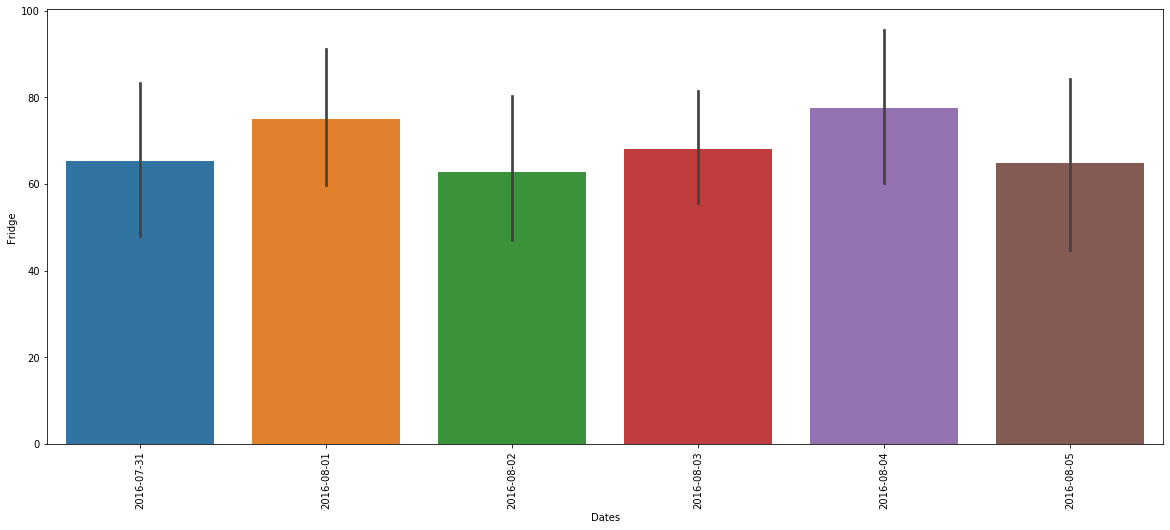

In [348]:
plt.figure(figsize=(20,8))
x = df2["Dates"]
y = df2["Fridge"]
plt.xticks(rotation=90)
sns.barplot(x,y)

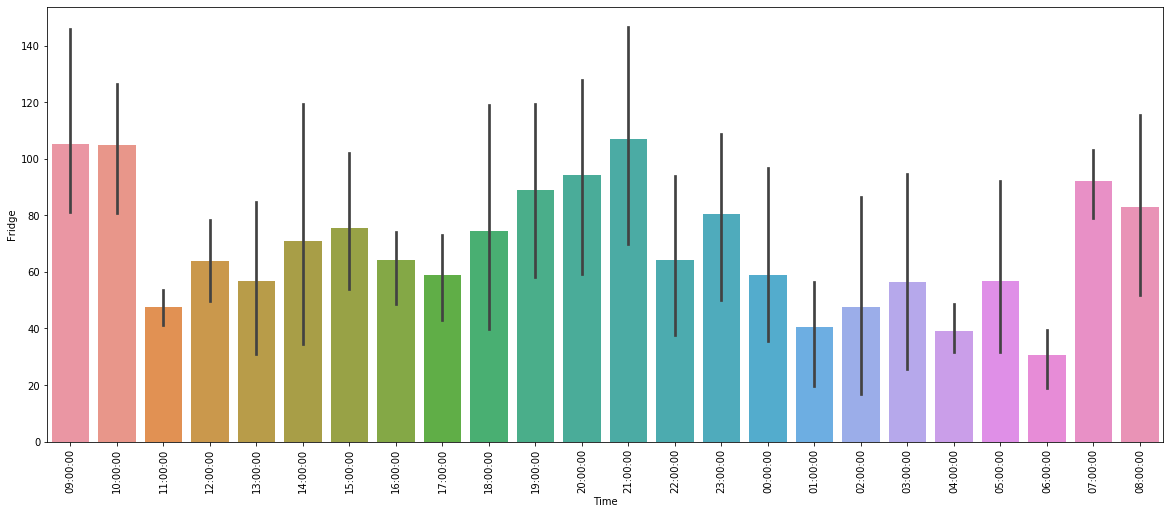

In [349]:
plt.figure(figsize=(20,8))
x = df2["Time"]
y = df2["Fridge"]
plt.xticks(rotation=90)
sns.barplot(x,y)

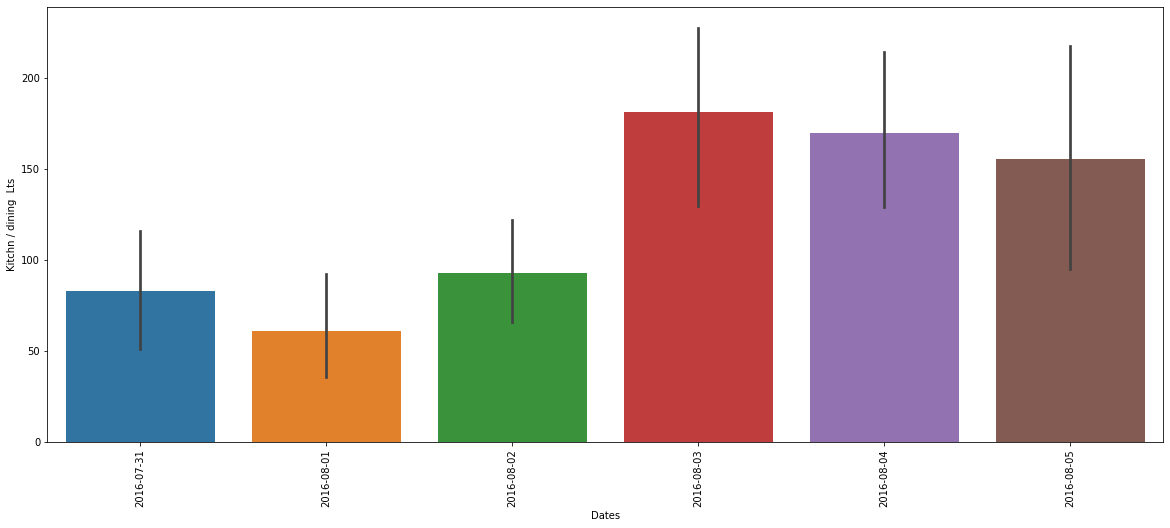

In [350]:
plt.figure(figsize=(20,8))
x = df2["Dates"]
y = df2["Kitchn / dining  Lts"]
plt.xticks(rotation=90)
sns.barplot(x,y)

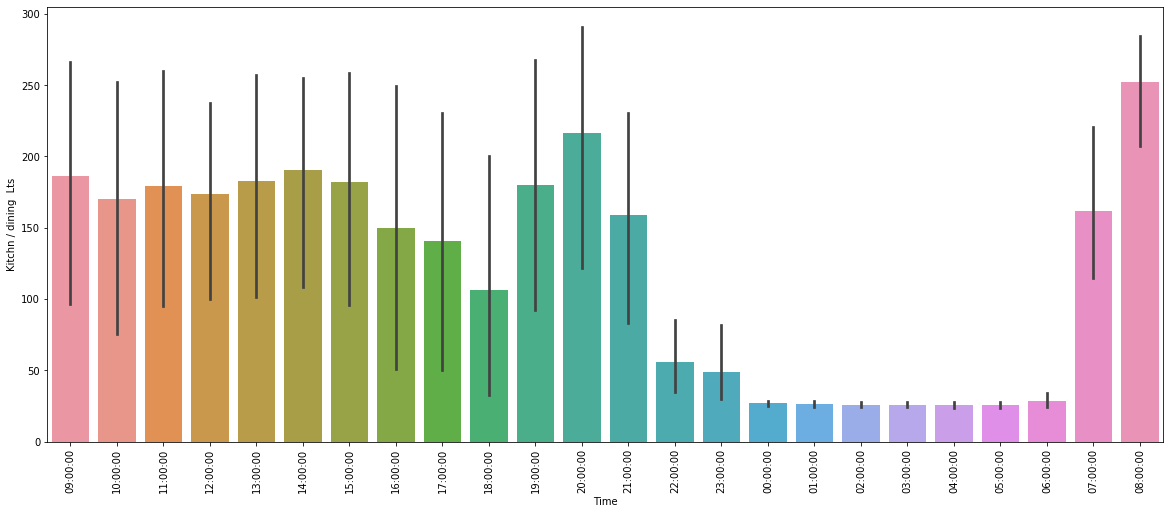

In [351]:
plt.figure(figsize=(20,8))
x = df2["Time"]
y = df2["Kitchn / dining  Lts"]
plt.xticks(rotation=90)
sns.barplot(x,y)

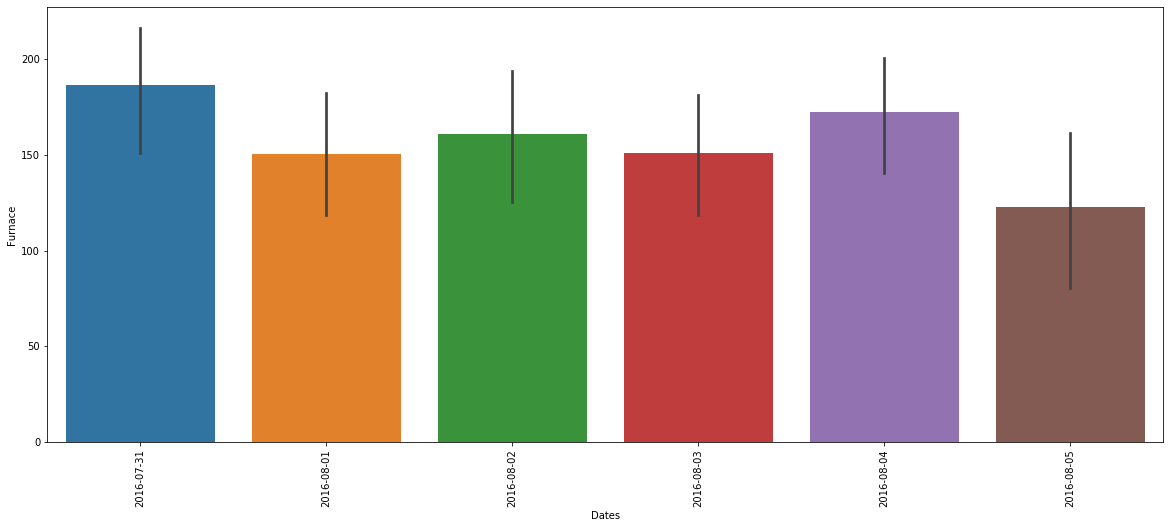

In [352]:
plt.figure(figsize=(20,8))
x = df2["Dates"]
y = df2["Furnace"]
plt.xticks(rotation=90)
sns.barplot(x,y)

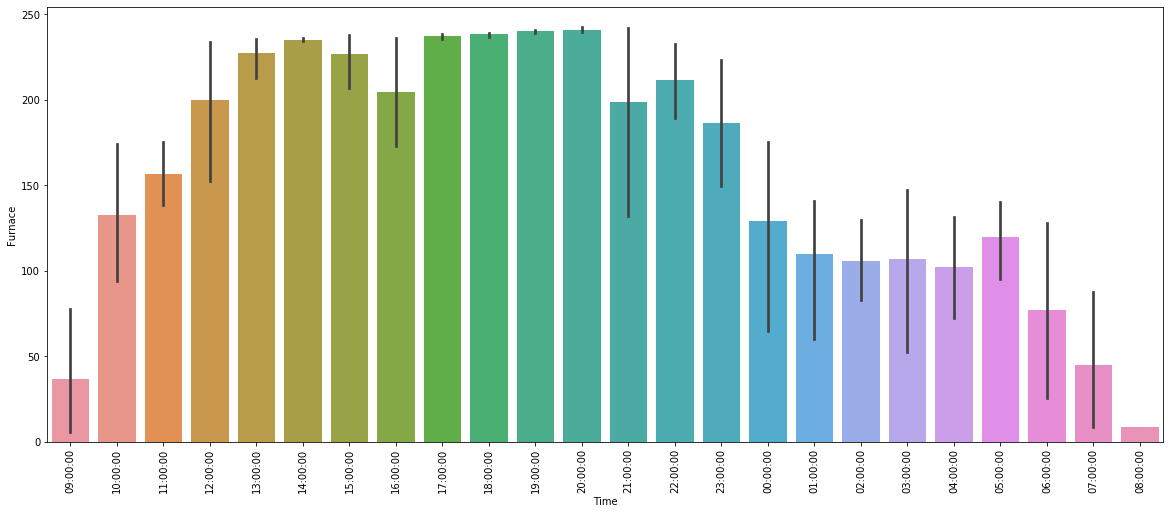

In [353]:
plt.figure(figsize=(20,8))
x = df2["Time"]
y = df2["Furnace"]
plt.xticks(rotation=90)
sns.barplot(x,y)

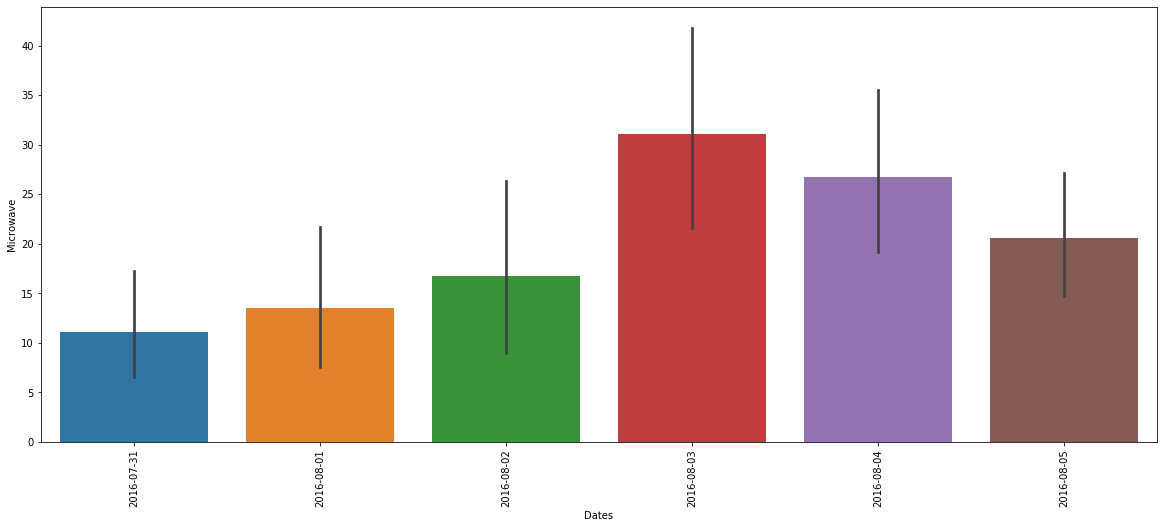

In [354]:
plt.figure(figsize=(20,8))
x = df2["Dates"]
y = df2["Microwave"]
plt.xticks(rotation=90)
sns.barplot(x,y)

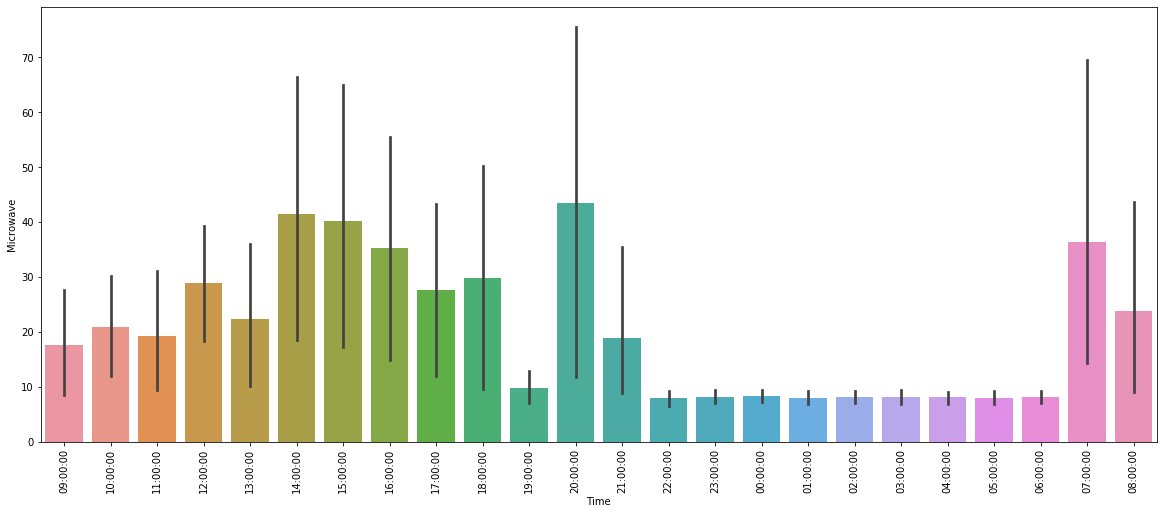

In [355]:
plt.figure(figsize=(20,8))
x = df2["Time"]
y = df2["Microwave"]
plt.xticks(rotation=90)
sns.barplot(x,y)

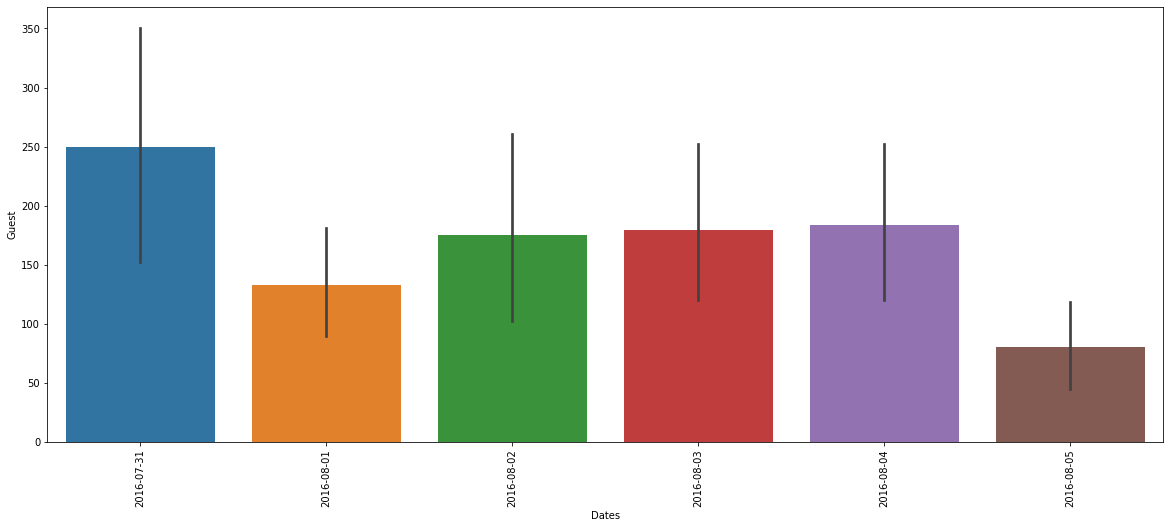

In [356]:
plt.figure(figsize=(20,8))
x = df2["Dates"]
y = df2["Guest"]
plt.xticks(rotation=90)
sns.barplot(x,y)

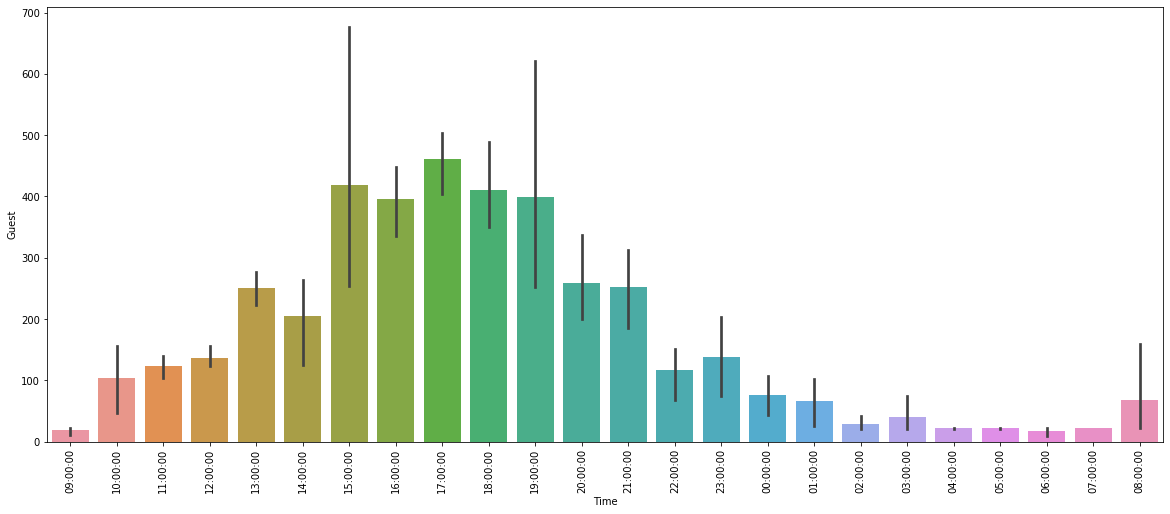

In [357]:
plt.figure(figsize=(20,8))
x = df2["Time"]
y = df2["Guest"]
plt.xticks(rotation=90)
sns.barplot(x,y)

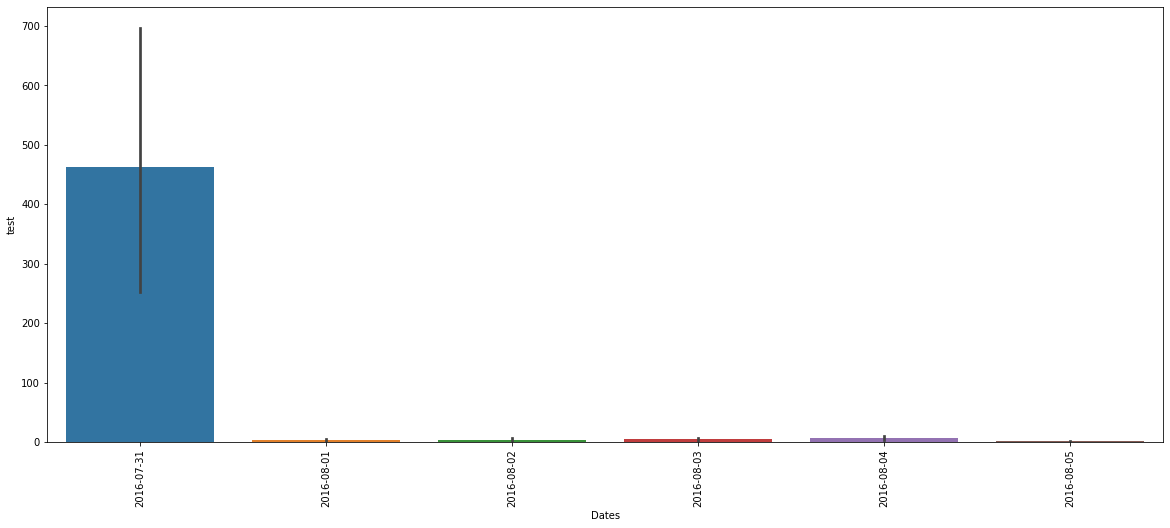

In [358]:
plt.figure(figsize=(20,8))
x = df2["Dates"]
y = df2["test"]
plt.xticks(rotation=90)
sns.barplot(x,y)

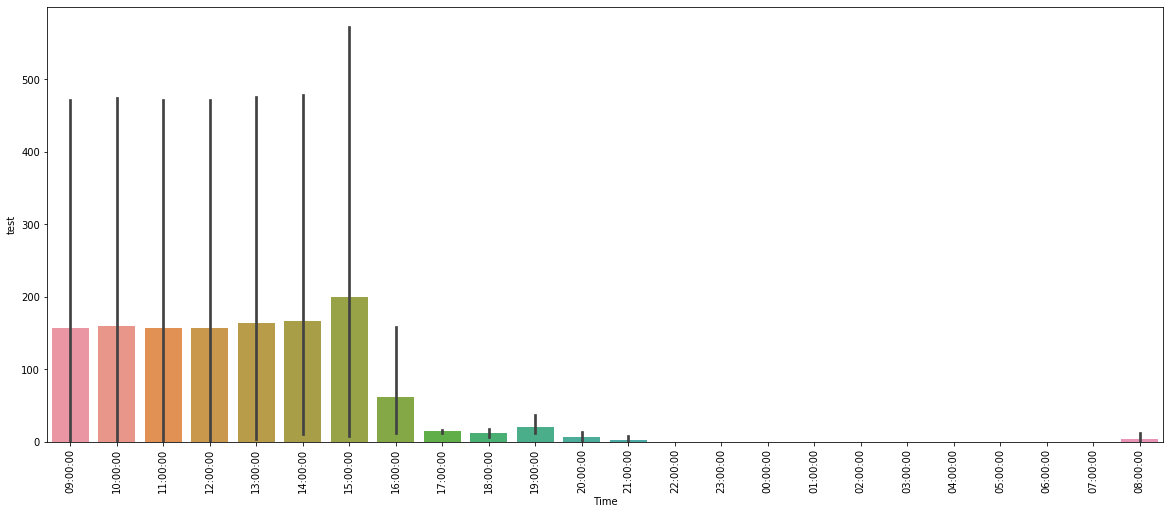

In [359]:
plt.figure(figsize=(20,8))
x = df2["Time"]
y = df2["test"]
plt.xticks(rotation=90)
sns.barplot(x,y)

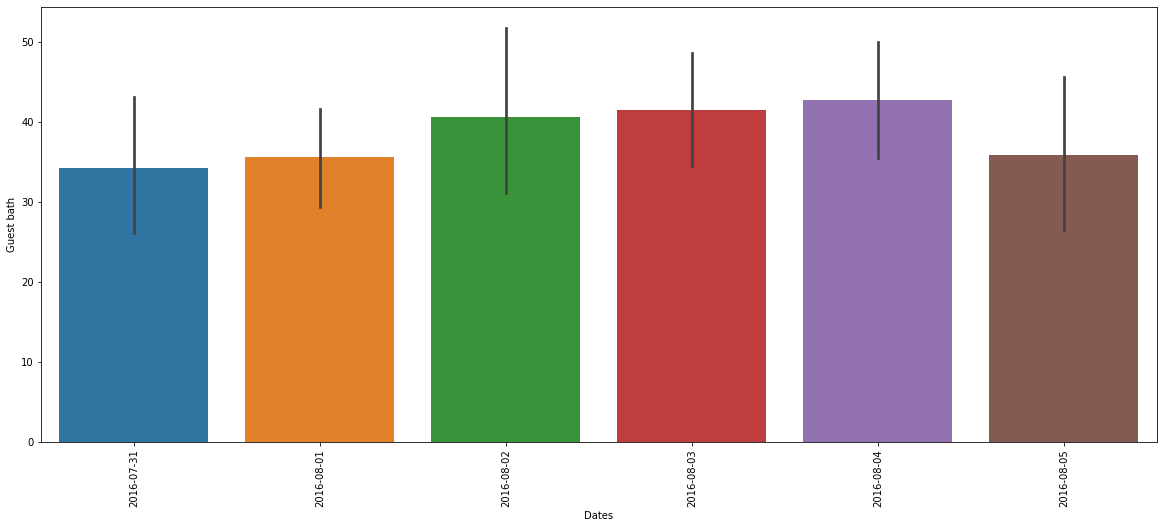

In [360]:
plt.figure(figsize=(20,8))
x = df2["Dates"]
y = df2["Guest bath"]
plt.xticks(rotation=90)
sns.barplot(x,y)

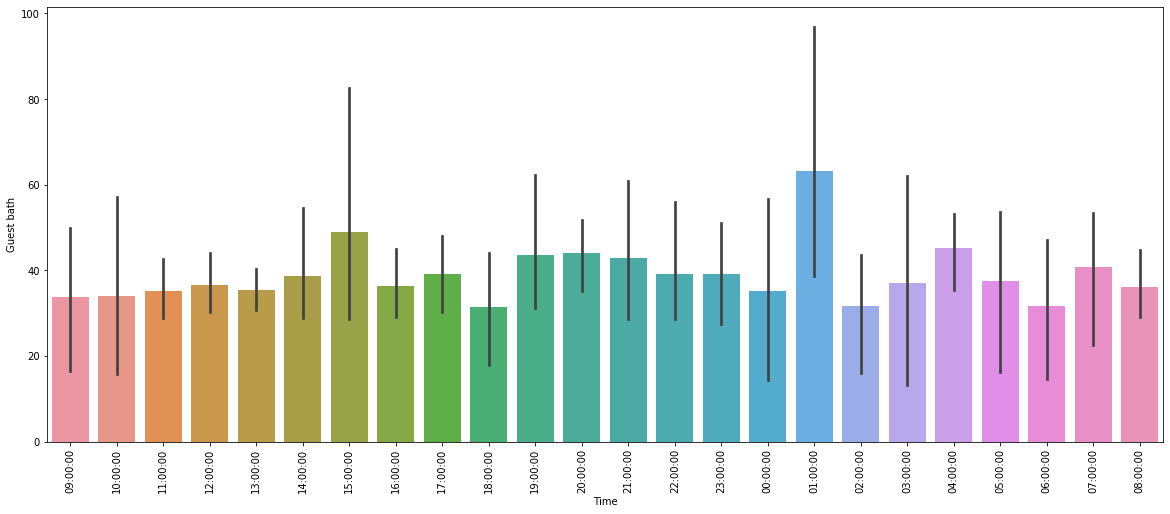

In [361]:
plt.figure(figsize=(20,8))
x = df2["Time"]
y = df2["Guest bath"]
plt.xticks(rotation=90)
sns.barplot(x,y)

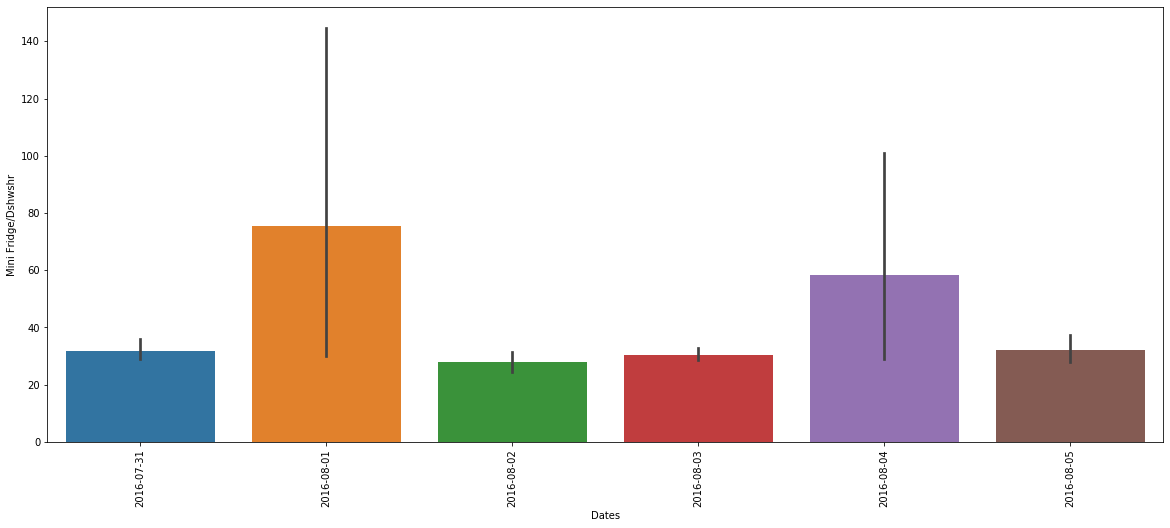

In [362]:
plt.figure(figsize=(20,8))
x = df2["Dates"]
y = df2["Mini Fridge/Dshwshr"]
plt.xticks(rotation=90)
sns.barplot(x,y)

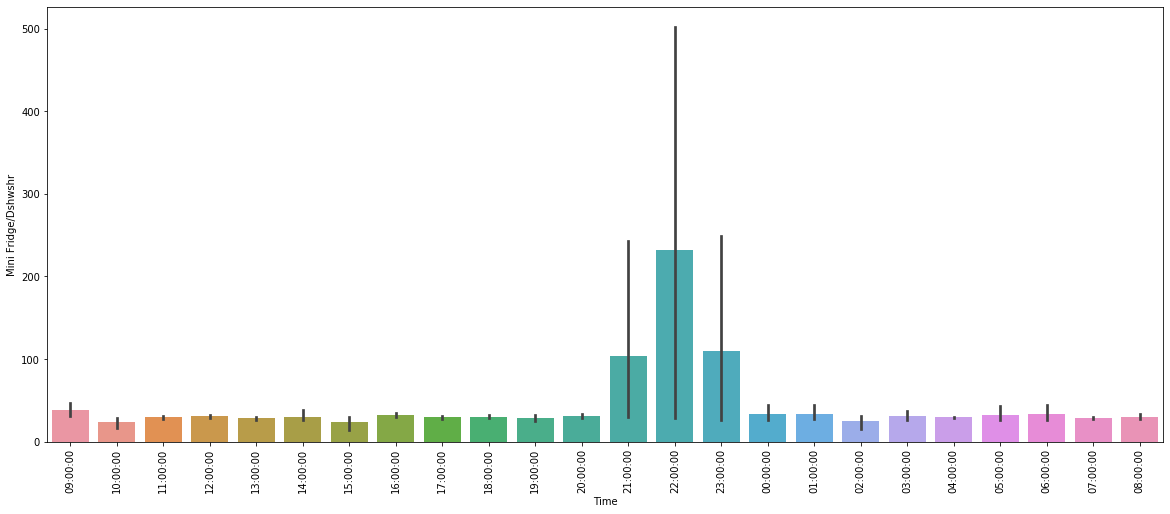

In [363]:
plt.figure(figsize=(20,8))
x = df2["Time"]
y = df2["Mini Fridge/Dshwshr"]
plt.xticks(rotation=90)
sns.barplot(x,y)

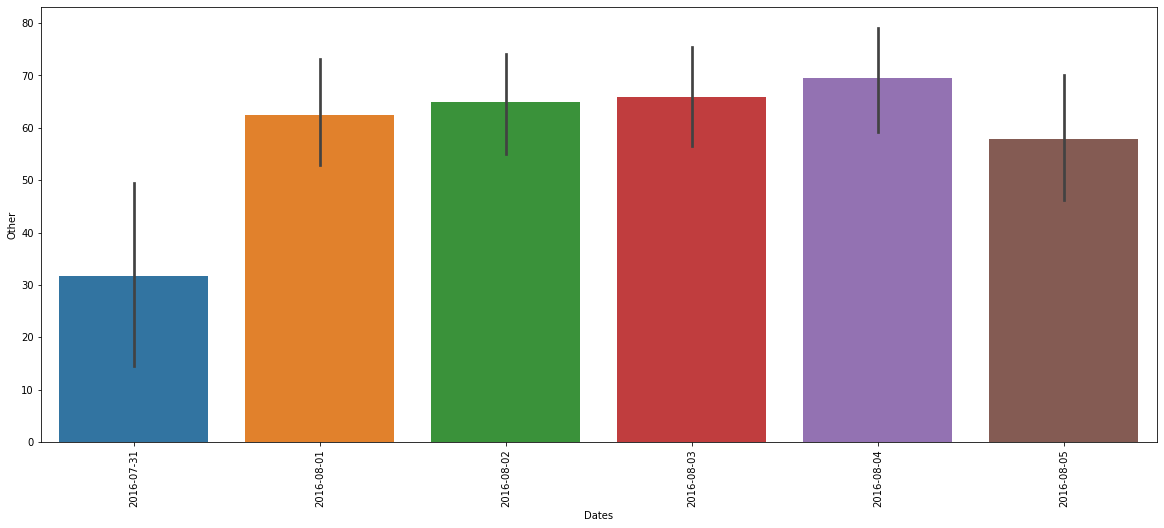

In [364]:
plt.figure(figsize=(20,8))
x = df2["Dates"]
y = df2["Other"]
plt.xticks(rotation=90)
sns.barplot(x,y)

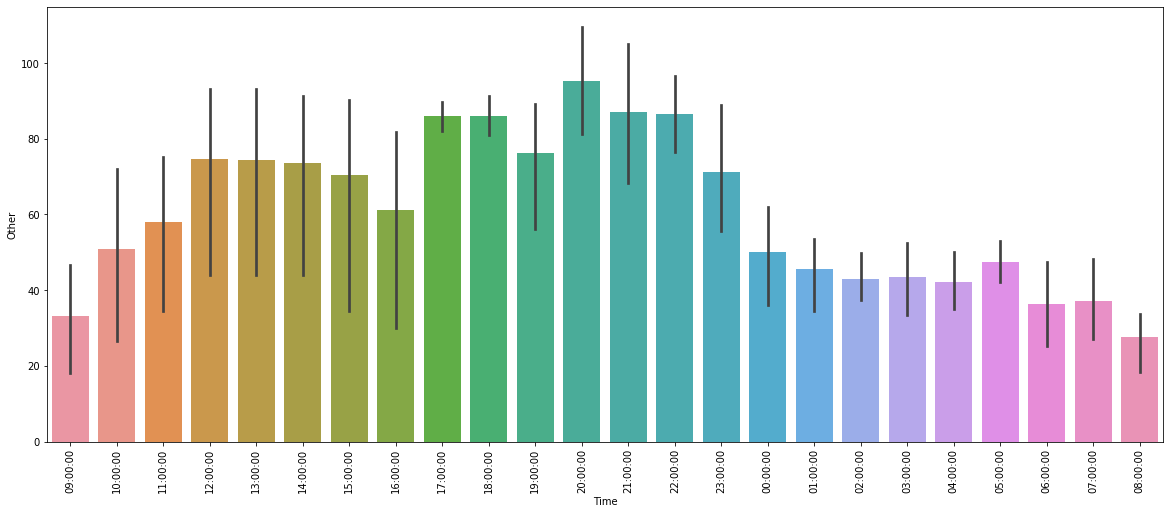

In [365]:
plt.figure(figsize=(20,8))
x = df2["Time"]
y = df2["Other"]
plt.xticks(rotation=90)
sns.barplot(x,y)

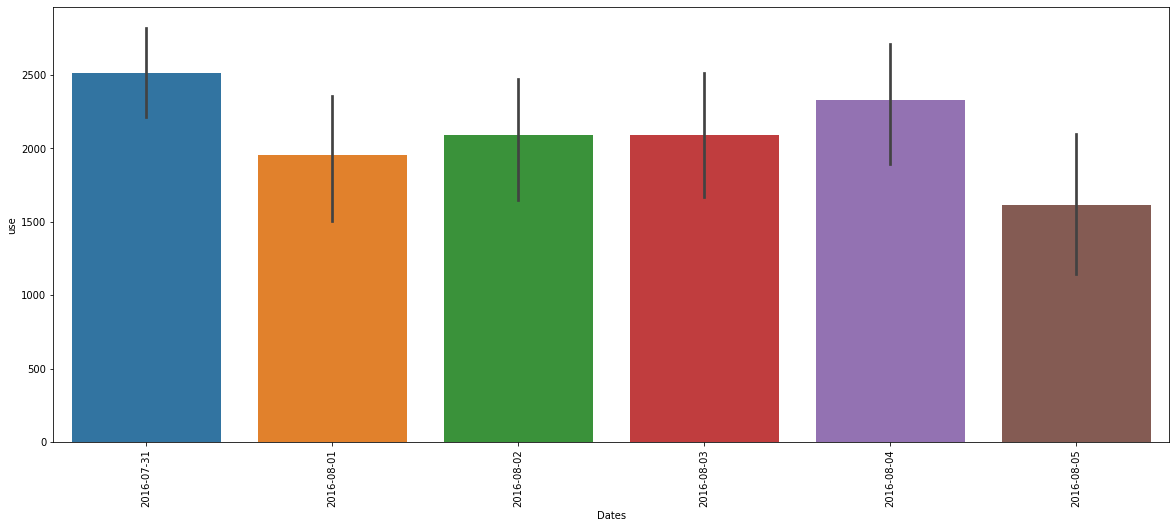

In [366]:
plt.figure(figsize=(20,8))
x = df2["Dates"]
y = df2["use"]
plt.xticks(rotation=90)
sns.barplot(x,y)

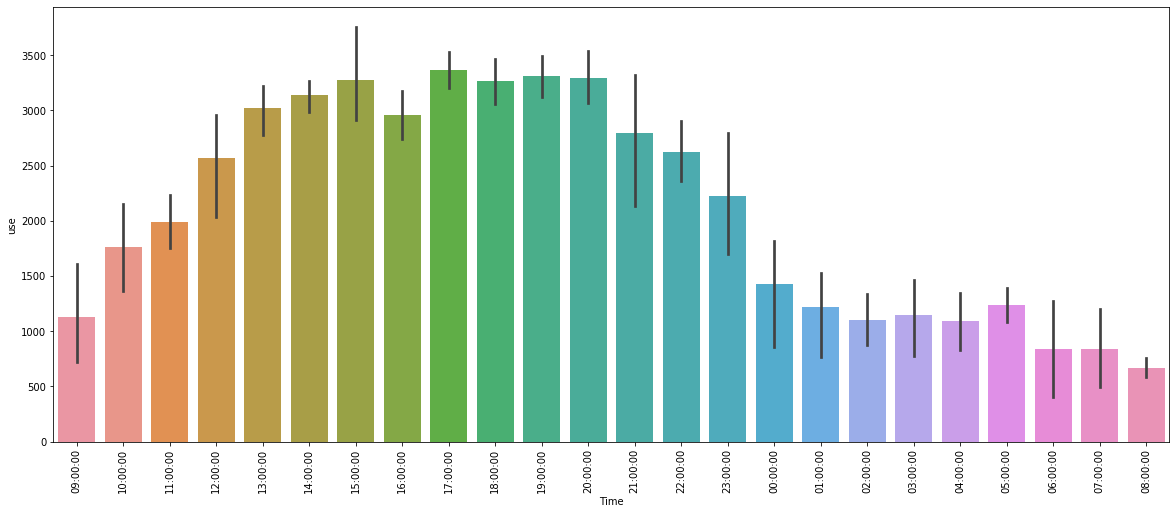

In [367]:
plt.figure(figsize=(20,8))
x = df2["Time"]
y = df2["use"]
plt.xticks(rotation=90)
sns.barplot(x,y)

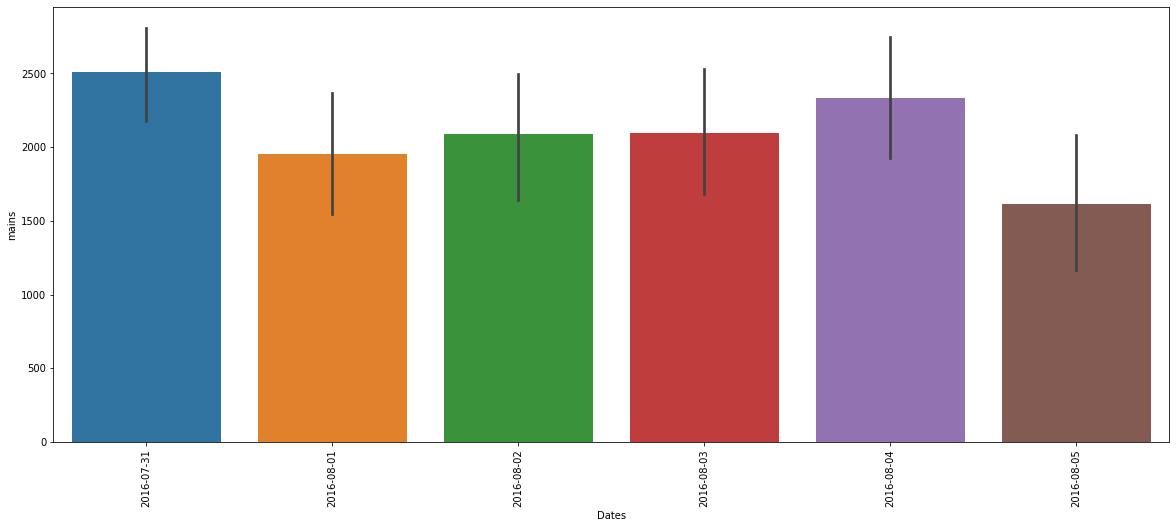

In [368]:
plt.figure(figsize=(20,8))
x = df2["Dates"]
y = df2["mains"]
plt.xticks(rotation=90)
sns.barplot(x,y)

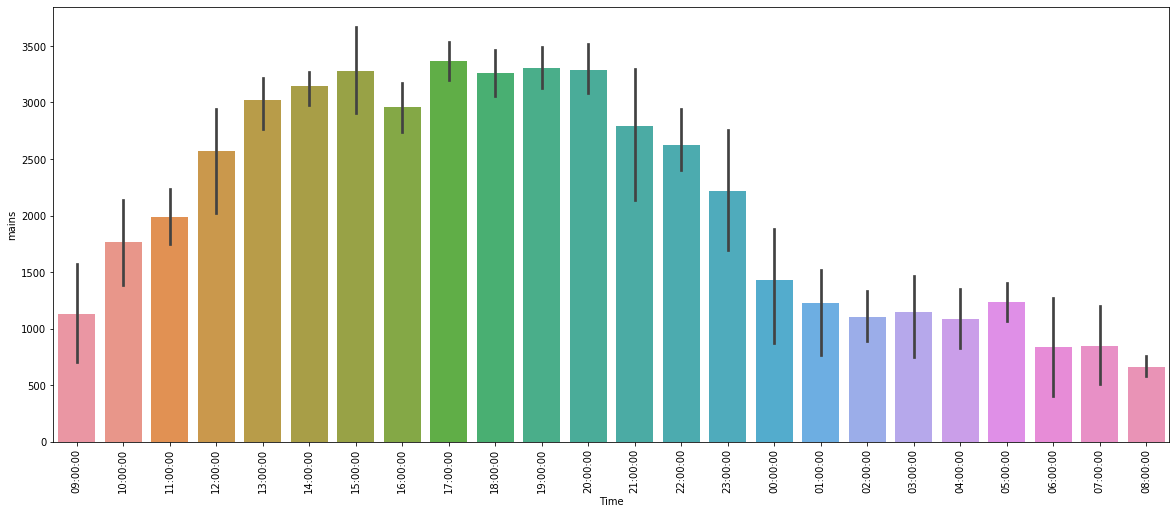

In [369]:
plt.figure(figsize=(20,8))
x = df2["Time"]
y = df2["mains"]
plt.xticks(rotation=90)
sns.barplot(x,y)

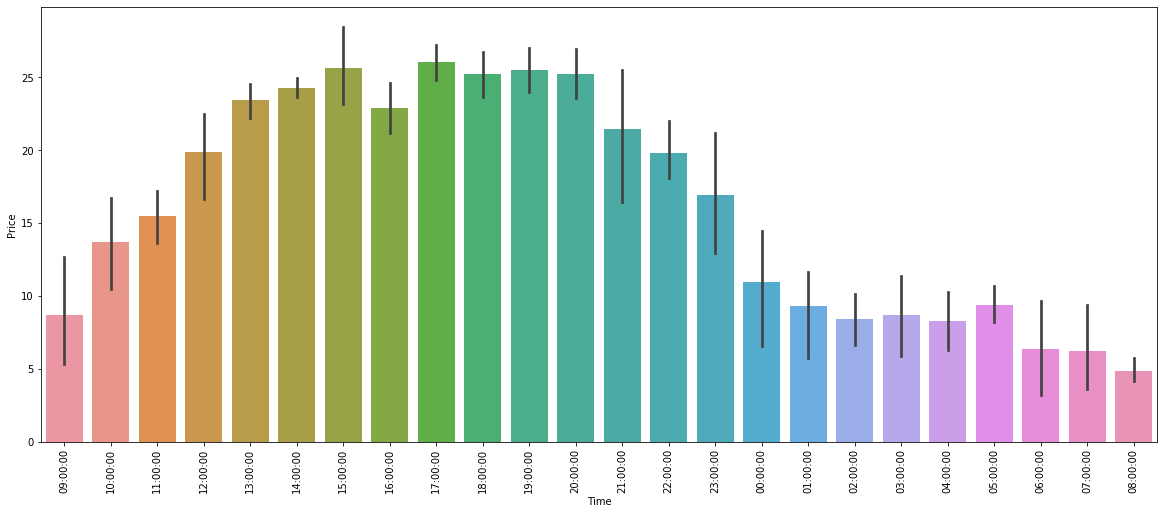

In [373]:
plt.figure(figsize=(20,8))
x = df2["Time"]
y = df2["Price"]
plt.xticks(rotation=90)
sns.barplot(x,y)

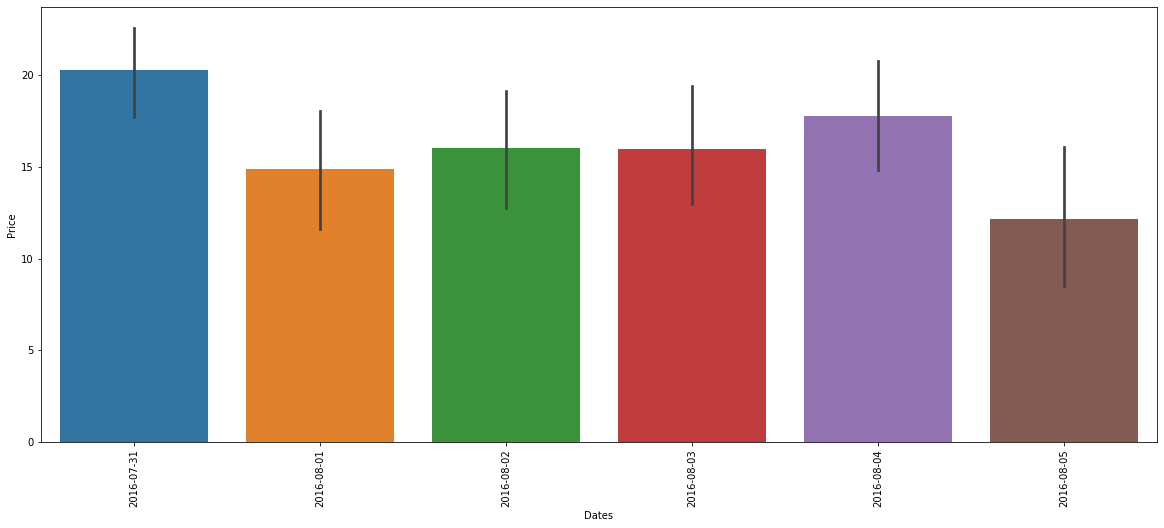

In [374]:
plt.figure(figsize=(20,8))
x = df2["Dates"]
y = df2["Price"]
plt.xticks(rotation=90)
sns.barplot(x,y)

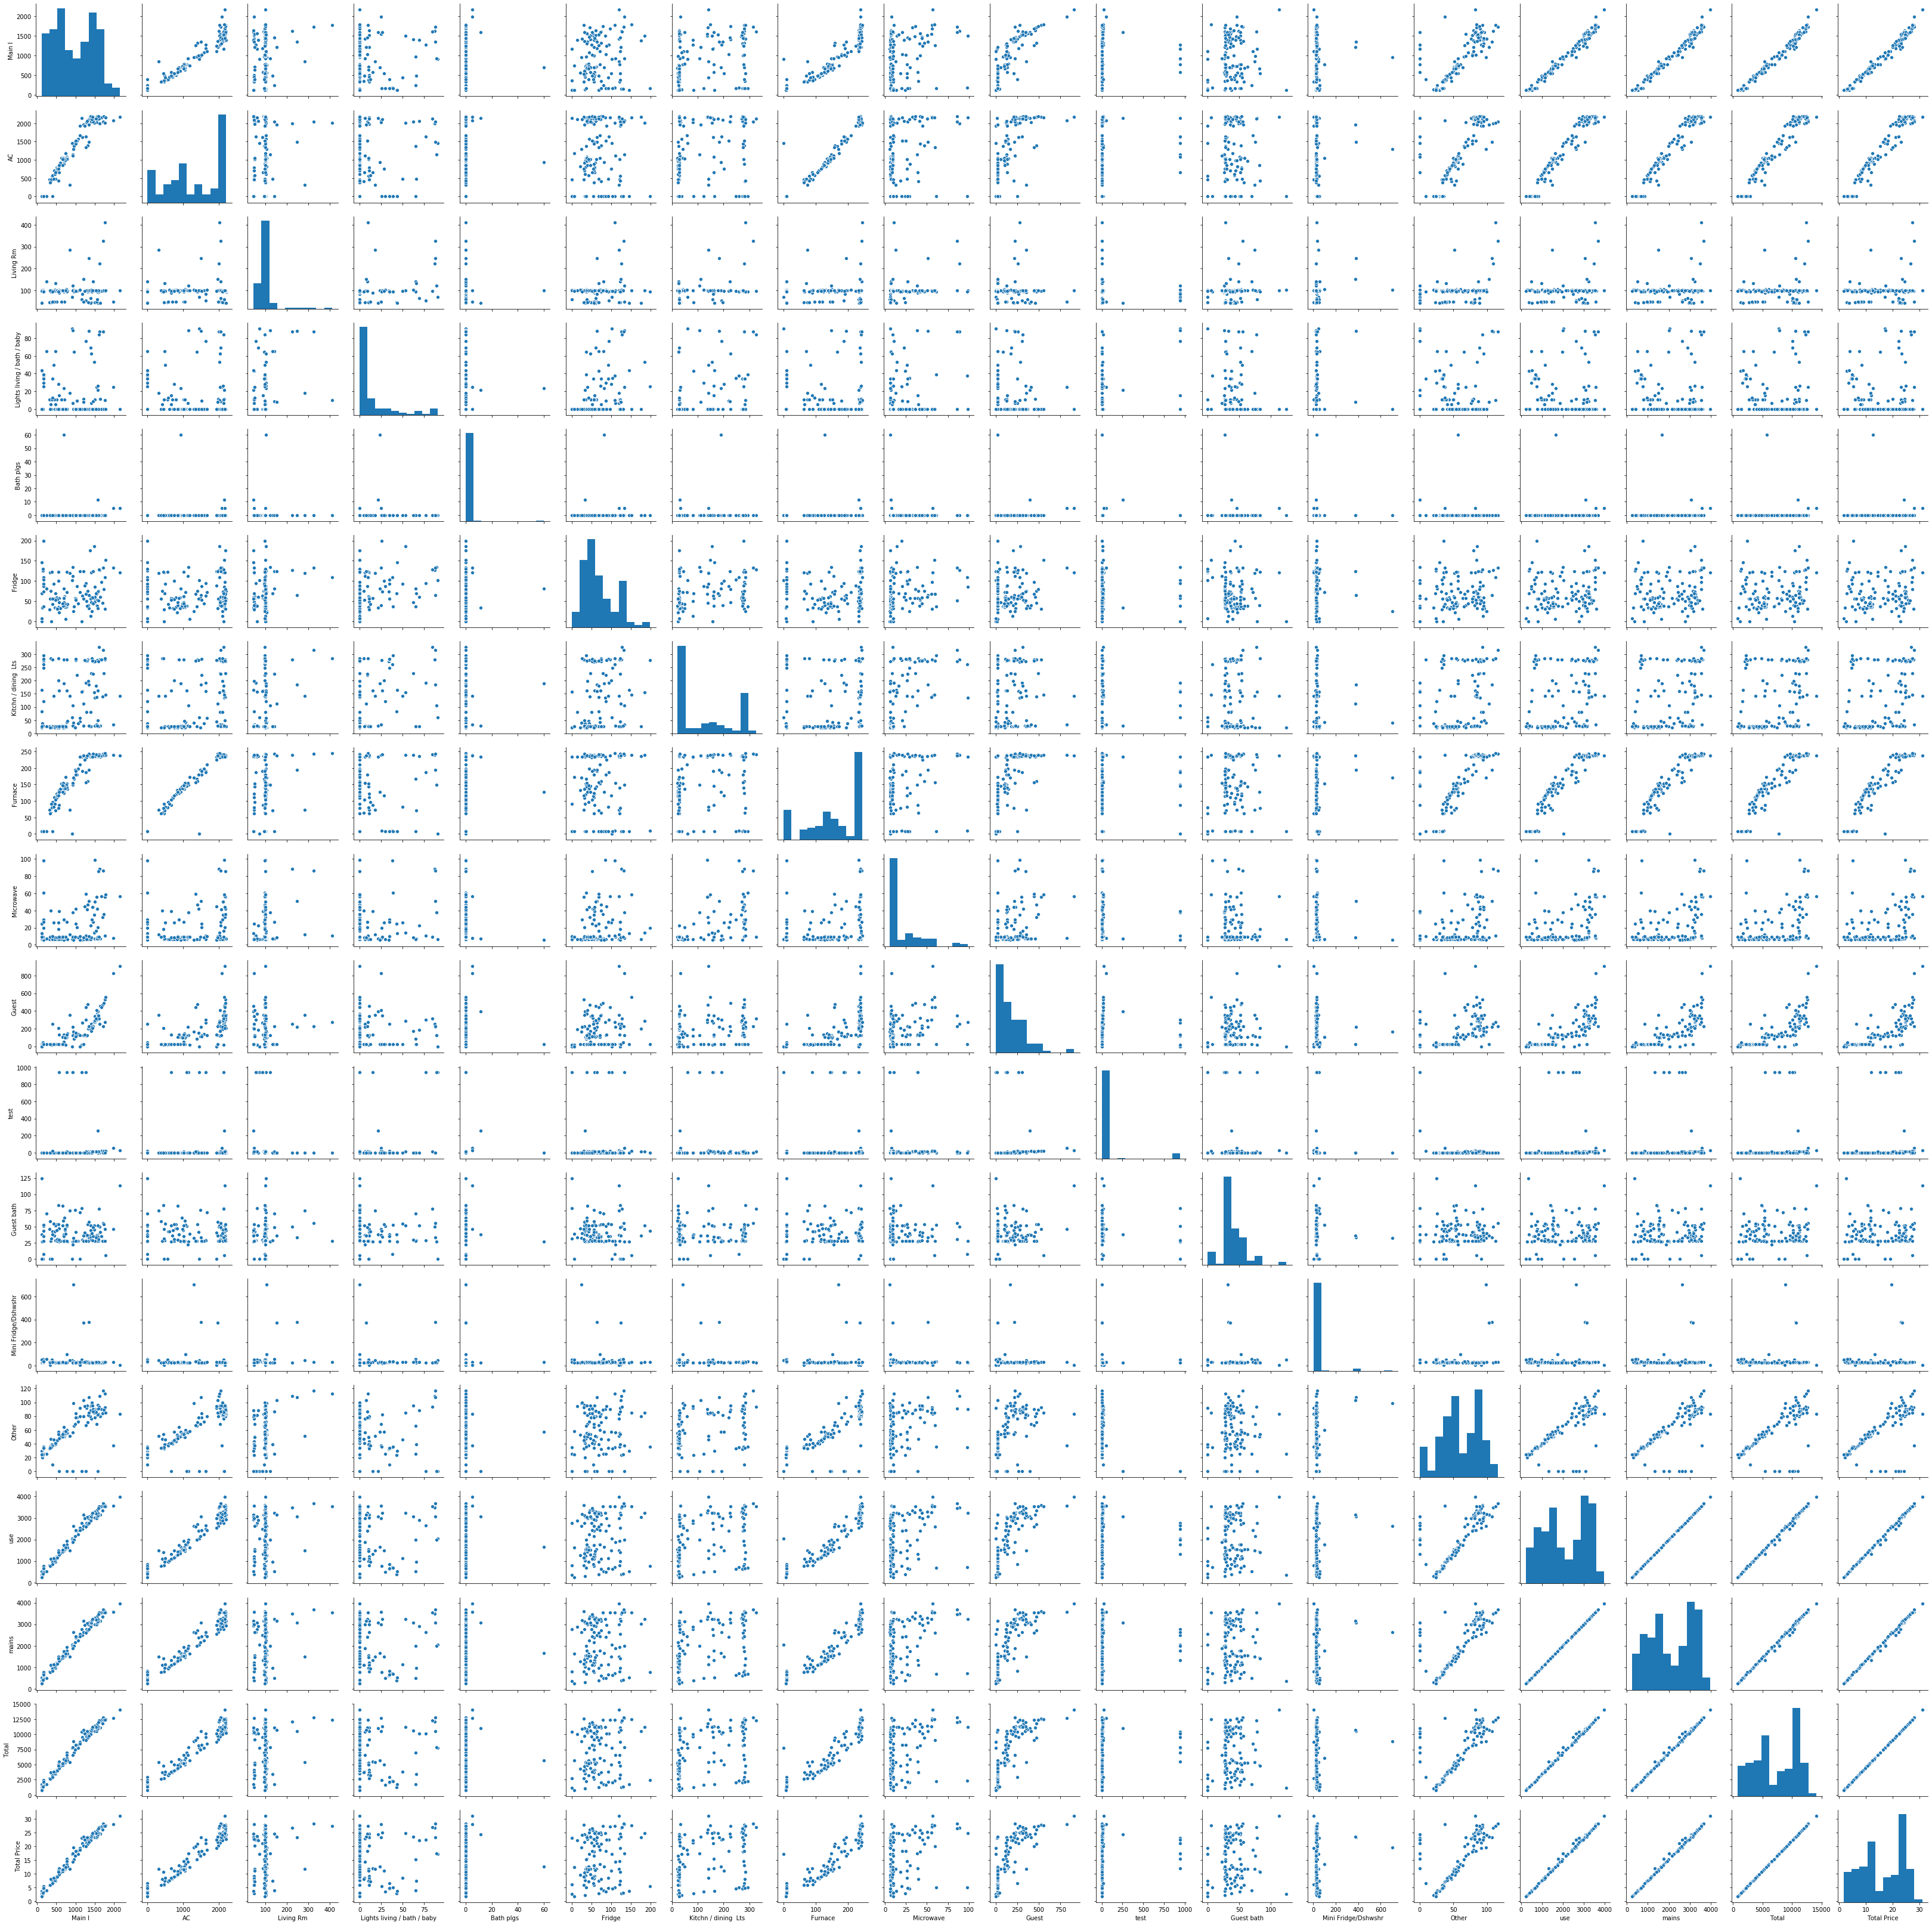

In [290]:
sns.pairplot(df2)

In [375]:
df2.columns

Index(['Dates', 'Time', 'Main I', 'AC', 'Living Rm',
       'Lights living / bath / baby', 'Bath plgs', 'Fridge',
       'Kitchn / dining  Lts', 'Furnace', 'Microwave', 'Guest', 'test',
       'Guest bath', 'Mini Fridge/Dshwshr', 'Other', 'use', 'mains', 'Price'],
      dtype='object')

In [376]:
import plotly.express as px

In [378]:
fig = px.pie(df2, values='Price', names='Dates', title='Price Per Day')
fig.show()

In [380]:
fig = px.pie(df2, values='Price', names='Time', title='Price Per Hour')
fig.show()

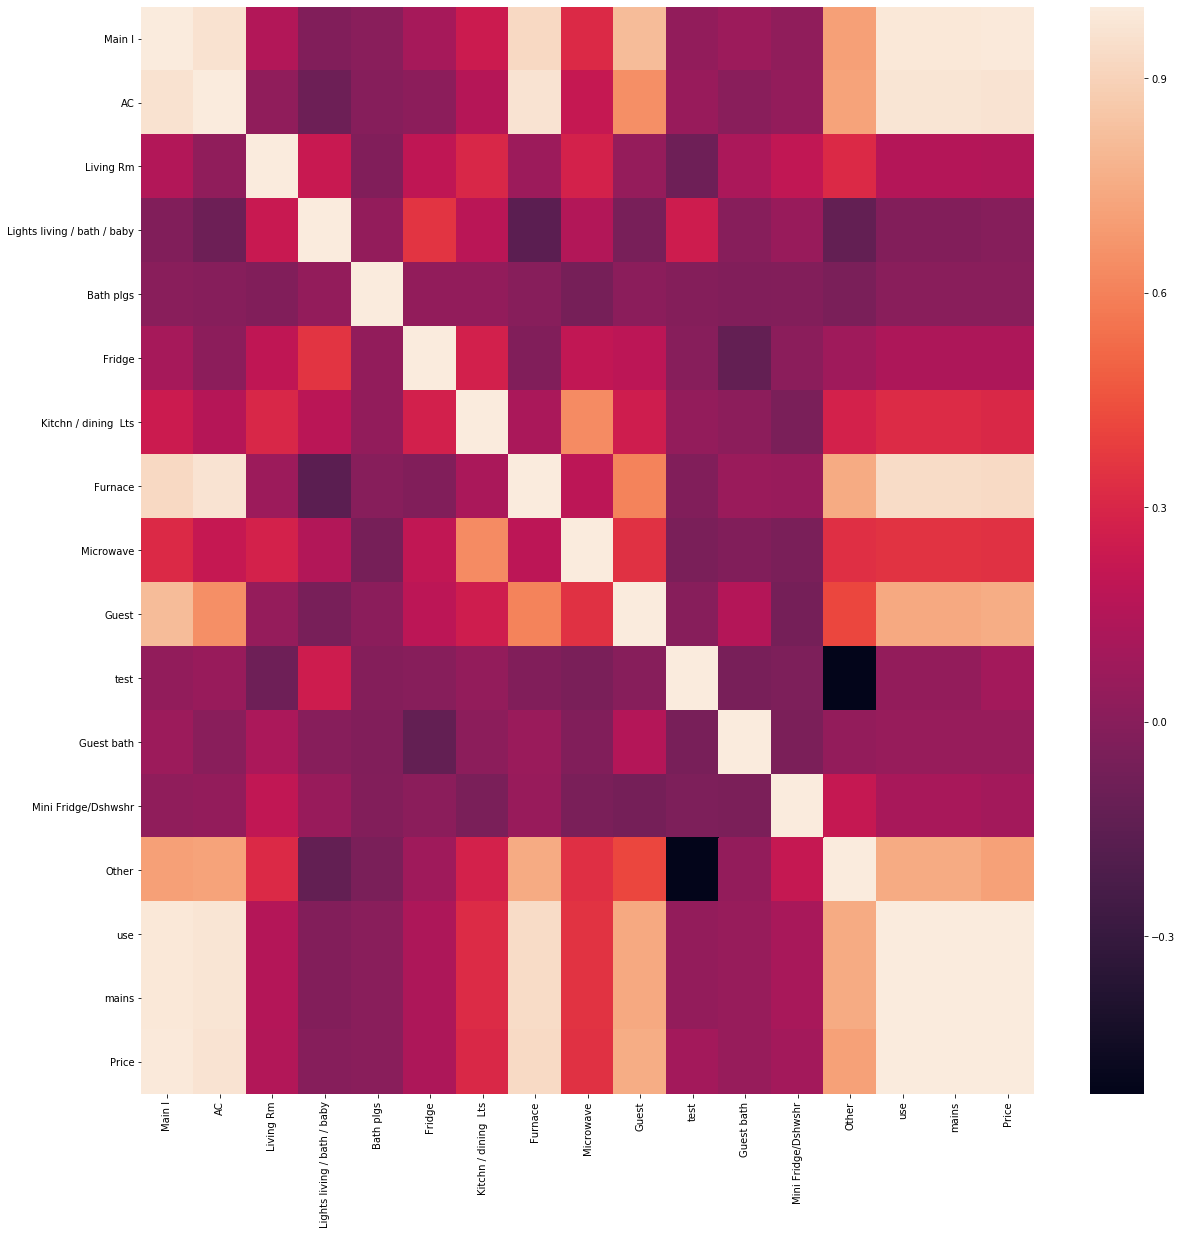

In [381]:
plt.figure(figsize=(20,20))
sns.heatmap(df2.corr())
plt.show()

# Model 

In [383]:
x = df2.drop(["Price"], axis = 1)
y = df2["Price"]

In [384]:
x.head()

,Dates,Time,Main I,AC,Living Rm,Lights living / bath / baby,Bath plgs,Fridge,Kitchn / dining Lts,Furnace,Microwave,Guest,test,Guest bath,Mini Fridge/Dshwshr,Other,use,mains
0,2016-07-31,09:00:00,909.066398,1452.204957,70.742116,90.943929,0.0,101.452290,60.543820,0.000000,6.161513,0.000000,943.106552,0.000000,46.881162,0.0,2044.531187,2044.531187
1,2016-07-31,10:00:00,928.834122,1153.470483,121.270728,89.073750,0.0,133.702863,106.016417,149.113886,37.952398,125.527769,943.106552,26.302717,28.151907,0.0,1997.569719,1997.569719
2,2016-07-31,11:00:00,780.028611,1090.394879,101.716817,0.000000,0.0,38.674079,162.201625,145.187357,6.157197,115.612561,943.106552,50.466295,27.356844,0.0,1767.231389,1767.231389
3,2016-07-31,12:00:00,577.240556,655.752587,89.095648,15.071262,0.0,57.763612,161.788384,87.997235,38.938323,130.161645,943.106552,26.339928,31.385268,0.0,1319.693889,1319.693889
4,2016-07-31,13:00:00,1180.745556,1626.139890,84.774443,0.000000,0.0,63.439516,160.824700,190.763621,6.260919,264.954291,943.106552,29.593455,31.506551,0.0,2487.751389,2487.751389


In [385]:
y.head()

0    17.172065
1    17.321235
2    15.459758
3    12.053404
4    21.122323
Name: Price, dtype: float64

In [386]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [387]:
test_date = x_test.Dates
test_time = x_test.Time

In [388]:
x_train = x_train.drop(["Dates", "Time"], axis = 1)
x_test = x_test.drop(["Dates", "Time"], axis = 1)

In [389]:
from sklearn.metrics import mean_squared_error, r2_score

def train(model):
    model.fit(x_train, y_train)
    y_train_pred = model.predict(x_train)
    y_test_pred = model.predict(x_test)
    
    mse = mean_squared_error(y_train, y_train_pred)
    r2 = r2_score(y_train, y_train_pred)
    print('For training data, mean squared error: {:.4f}, R2: {:.4f}'.format(mse, r2))

    mse = mean_squared_error(y_test, y_test_pred)
    r2 = r2_score(y_test, y_test_pred)
    print('For test data, mean squared error: {:.4f}, R2: {:.4f}'.format(mse, r2))

In [390]:
# linear regression
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
train(lr)

For training data, mean squared error: 0.0000, R2: 1.0000
For test data, mean squared error: 0.0000, R2: 1.0000


In [391]:
# ridge regression
from sklearn.linear_model import Ridge
rr = Ridge(alpha=0.5)
train(rr)

For training data, mean squared error: 0.0000, R2: 1.0000
For test data, mean squared error: 0.0000, R2: 1.0000


In [392]:
# lasso regression
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=0.1)
train(lasso)

For training data, mean squared error: 0.0006, R2: 1.0000
For test data, mean squared error: 0.0151, R2: 0.9998


C:\Users\MSI\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.7207156974267325, tolerance: 0.6078031443731252



# Finding Most Significant Feature

In [393]:
x = x.drop(["Dates", "Time"], axis = 1)

In [403]:
coef = rr.coef_
# to get the order of index
ind = np.argsort(-abs(coef))

In [404]:
ind

array([14, 15, 10, 13,  0,  3,  9,  2,  4,  1, 11,  5,  6, 12,  8,  7],
      dtype=int64)

In [405]:
lab = x.columns[ind]

In [406]:
lab

Index(['use', 'mains', 'test', 'Other', 'Main I',
       'Lights living / bath / baby', 'Guest', 'Living Rm', 'Bath plgs', 'AC',
       'Guest bath', 'Fridge', 'Kitchn / dining  Lts', 'Mini Fridge/Dshwshr',
       'Microwave', 'Furnace'],
      dtype='object')

In [407]:
coef = pd.Series(ind, lab)

In [408]:
coef

use                            14
mains                          15
test                           10
Other                          13
Main I                          0
Lights living / bath / baby     3
Guest                           9
Living Rm                       2
Bath plgs                       4
AC                              1
Guest bath                     11
Fridge                          5
Kitchn / dining  Lts            6
Mini Fridge/Dshwshr            12
Microwave                       8
Furnace                         7
dtype: int64

Text(0.5, 1.0, 'Feature importance')

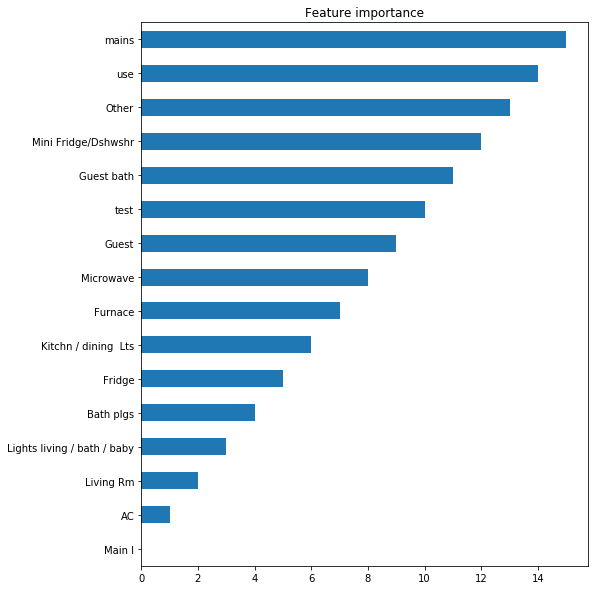

In [409]:
imp_coef = coef.sort_values()
import matplotlib
matplotlib.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef.plot(kind = "barh")
plt.title("Feature importance")

# Prediction

In [411]:
# ridge regression
from sklearn.linear_model import Ridge
rr = Ridge(alpha=0.5)
rr.fit(x_train, y_train)
y_pred = rr.predict(x_test)

In [417]:
out_df = pd.DataFrame()

In [418]:
out_df["Date"] = test_date
out_df["Time"] = test_time
out_df["Actual"] = y_test
out_df["Predicted"] = y_pred

In [419]:
out_df

,Date,Time,Actual,Predicted
73,2016-08-03,10:00:00,13.048159,13.048174
19,2016-08-01,04:00:00,5.946881,5.946883
116,2016-08-05,05:00:00,9.829101,9.829097
67,2016-08-03,04:00:00,10.328737,10.328740
94,2016-08-04,07:00:00,8.497246,8.497269
77,2016-08-03,14:00:00,24.879579,24.879592
31,2016-08-01,16:00:00,24.420521,24.420535
53,2016-08-02,14:00:00,24.809793,24.809741
117,2016-08-05,06:00:00,1.792833,1.792861
44,2016-08-02,05:00:00,9.593905,9.593901
